## **Summary**

The main functionality of this tool is to calculate the both Equity and Enterprise value of a selected 
company with the DCF method. The forcasting of the future FCF and stocks are conducted through a Monte Carlo simulation
This project, in order to be properly executed, requires a significant capacity of RAM.
Furthemore, it relies on the following significant **assumptions**:
1) the application of the tool cannot be global due to the different countries regulations,
2) the source of information (APIs) is Financial Modeling Prep. The access there is limited and refers to US market,
3) the project it doesn't take into account the various indexes, yet.

It is evolving and currently in its early stage.


In [93]:
#import all the needed libraries 
import numpy as np
import pandas as pd
from scipy.stats import norm      
!pip install yfinance           #install the finance library
import yfinance as yf
!pip install scipy              #install the scipy library
from scipy.stats import norm    #for statistic results 
import matplotlib.pyplot as plt #vualization as graphs etc
from scipy import stats
import requests
import json

def fin_reports(title_of_report,ticker):
    base_url = "https://financialmodelingprep.com/stable/"
    API_key = "alUbVfkBphTeynheR86urouvAMFPrwX1"
    url = f"{base_url}{title_of_report}?symbol={ticker}&apikey={API_key}"
    response=requests.get(url)
    print(response.text)
    data_response=response.json()
    df1=pd.DataFrame(data_response).T
    return df1
#def SEC(ticker,title_of_report,cik,f,t,p,l):
    #base_url="https://financialmodelingprep.com/stable/"
    #API_key="alUbVfkBphTeynheR86urouvAMFPrwX1"
    #url= f"https://financialmodelingprep.com/stable/{title_of_report}/cik?cik={cik}&from={f}&to={t}&page={p}&limit={l}&apikey={API_key}"
    #response=requests.get(url)
    #data_response=response.json()
    #df2=pd.DataFrame(data_response).T
    #return df2
def WACC_parts(cik):
    base_url="https://financialmodelingprep.com/stable/"
    API_key="alUbVfkBphTeynheR86urouvAMFPrwX1"
    url= f"https://financialmodelingprep.com/stable/profile-cik?cik={cik}&apikey={API_key}"
    response=requests.get(url)
    data_response=response.json()
    df3=pd.DataFrame(data_response).T
    return df3
def mrp(title_of_report):
    base_url="https://financialmodelingprep.com/stable/"
    API_key="alUbVfkBphTeynheR86urouvAMFPrwX1"
    url= f"https://financialmodelingprep.com/stable/{title_of_report}?apikey={API_key}"
    response=requests.get(url)
    data_response=response.json()
    df4=pd.DataFrame(data_response).T
    return df4
    

In [2]:
#the user will enter the company ticker and the date he want to make the extraction 
#the input function return a string, if the input is wronγ it will occur an error
ticker=input("Enter the ticker company you want: ")
year=input("Enter the year you want start the download: ")
year_now=input("Enter the current year: ")

Enter the ticker company you want:  AAPL
Enter the year you want start the download:  2015
Enter the current year:  2025


In [3]:
i=0
while (i!=1):
    if int(year)<int(year_now) and (int(year_now)-int(year)>=10):
        m_d=input("Enter the month and days for the download (-MM-DD): ")
        i=1
    else:
        print ("The selected date will bring false forcasting result, please choose bigger year")
        year=input("Enter the year (YYYY): ")
date=year+m_d       
#try:
    #c={"CIK":"i", "f":"i", "t":"i", "p":"i", "l":"i"}
    #list_keys=list(c.keys())
    #key="CIK"
    #index=list_keys.index(key)
    #for i in range(len(list_keys)):
        #value=input(f"Εnter a {list_keys[i]}:")
        #c[list_keys[i]]=value
    #new_data=pd.DataFrame()
#except Exception as e:   # πιάσε οποιοδήποτε σφάλμα
    #print("We didn't succeed to extract the data", e)
    #new_data = pd.DataFrame() 


Enter the month and days for the download (-MM-DD):  -01-01


In [94]:
#creating an API in order to take financial reports
#calling defs

Balance_sheet = pd.DataFrame()  # Create an empty DataFrame without specifying columns or index
Cash_flow = pd.DataFrame()  # Create an empty DataFrame without specifying columns or index
Income = pd.DataFrame()  # Create an empty DataFrame without specifying columns or index
try:
    Balance_sheet = fin_reports("balance-sheet-statement", ticker)
    Cash_flow = fin_reports("cash-flow-statement", ticker)
    Income = fin_reports("income-statement", ticker)
    #SECfile=SEC(ticker,"sec-filings-search",c[CIK],c[f],c[t],c[p],c[l])
except json.JSONDecodeError as e:
    print(f"Error decoding JSON response: {e}")
    print("Check if:")
    print("1. Your API key is valid")
    print("2. The ticker symbol is correct")
    print("3. The API endpoint URLs are correct")
    print("4. The API service is currently available")
# Optional: Print the raw response to debug
# print("Raw response:", response.text)  # Assuming response object is available
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#print(Balance_sheet)
print(Balance_sheet)

print(Income)



Premium Query Parameter: 'Special Endpoint : This value set for 'symbol' is not available under your current subscription please visit our subscription page to upgrade your plan at https://financialmodelingprep.com/
Error decoding JSON response: Expecting value: line 1 column 1 (char 0)
Check if:
1. Your API key is valid
2. The ticker symbol is correct
3. The API endpoint URLs are correct
4. The API service is currently available
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []


In [68]:
# Assistant
#calculating the 2024 FCF 
Ebit=Income.loc["ebit",0]
TaxExp=Income.loc["incomeTaxExpense",0]
Depre_Amort=Income.loc["depreciationAndAmortization",0]
short_term_liabilities_df=pd.DataFrame()
short_term_liabilities_df = pd.DataFrame(Balance_sheet[[
    "shortTermDebt",
    "accountPayables",
    "otherPayables",
    "accruedExpenses",
    "capitalLeaseObligationsCurrent",
    "taxPayables",
    "deferredRevenue",
    "otherCurrentLiabilities"
      ]
    ]
)


KeyError: 0

In [ ]:
try:
    NWC=(
        Balance_sheet.loc["totalCurrentAssets",0]-
        Balance_sheet.loc["cashAndShortTermInvestments",0]-
        short_term_liabilities_total_and_debt.sum(axis=1)
    ) #DF series
    DNWC = NWC.diff(-1)
    k = 1  # Added this to indicate success
except NameError:
    print ("We couldn't extract the provisions")
    k=0
else:
    print ("We couldn't extract the provisions")
    
#in FCF we seperate the real outflows from inflows
if (k==0):
    Prov=0
    FCF=Ebit-TaxExp+Depre_Amort+Prov-(NWC[0]-NWC[1])-Capex
else:
    FCF2024=Ebit-TaxExp+Depre_Amort+Prov-DNWC-Capex
    
Capex= Balance_sheet.loc["propertyPlantEquipmentNet",0]

In [9]:
#calculate the future FCF using monte carlo simulation
#calculating the mean and standard deviation
Ebit_all = Income.loc["ebit"]   
Ebit_mean = ebit_all.mean()     
std_ebit=Ebit_all.std()


Depre_Amort_all=Balance_sheet.loc["depreciationAndAmortization"]
Depre_Amort_mean=Depre_Amort_all.mean()
std_Depre_Amort=Depre_Amort.std()
DNWC_mean=DNWC.mean()
std_DNWC=DNWC.std()
Capex_all= Balance_sheet.loc["propertyPlantEquipmentNet"]
Capex_mean=Capex_all.mean()
std_Capex=Capex.std()

NameError: name 'Income' is not defined

In [ ]:
#monte carlo for 2025,2026 and 2027 since the program isnt running
#we didn't use margins ebit or Depre and Amort to sales
#i assume that the observations are distributed normally and symmetrically 
#and all their histograms are similar to the normal ones
iterations=1000 
ebit2=np.random.normal(Ebit_mean, std_ebit, iterations)

#MC to this since taxation is possible to be stable
dep_amort2=np.random.normal(Depre_Amort_mean, std_Depre_Amort, iterations)
dnwc2=np.random.normal(DNWC_mean, std_DNWC, iterations)
capex2=np.random.normal(Capex_mean, std_Capex, iterations)

plt.plot(ebit, label="EBIT")
plt.plot(dnwc, label="ΔNWC")
plt.plot(capex, label="CapEx")
plt.plot(dep_amort, label="Dep & Amort")

plt.legend()
plt.figure=(figsize=(15,6))
plt.title("Financial Metrics Over Time")
plt.xlabel("Year")
plt.ylabel("Value")
plt.show()

FCF2024=ebit2-TaxExp+dep_amort2-dnwc2+capex2

In [ ]:
ebit2_mean = ebit2.mean()     
std_ebit2=ebit2.std()

depre_dmort2_mean=dep_amort2.mean()
std_Depre_Amort2=dep_amort2.std()
dnwcC2_mean=dnwc2.mean()
std_dnwcC2=dnwc2.std()
capex2_mean=capex2.mean()
std_capex2=capex2.std()

#calculating the 2026 FCF 

ebit3=np.random.normal(ebit2_mean, std_ebit2, iterations)

dep_amort3=np.random.normal(depre_amort2_mean, std_depre_amort2, iterations)
dnwc3=np.random.normal(dnwc2_mean, std_dnwc2, iterations)
capex3=np.random.normal(capex2_mean, std_capex2, iterations)

#we will nor show this to the grams becais of possible crashing

FCF2025=ebit3-TaxExp+dep_amort3-dnwc3-capexebit2_mean = ebit2.mean()     

In [ ]:
#forcasting the 2027 FCF

ebit3_mean = ebit3.mean()     
std_ebit3=ebit3.std()

depre_amort3_mean=dep_amort3.mean()
std_Depre_Amort3=dep_amort3.std()
dnwcC3_mean=dnwc3.mean()
std_DNWC3=dnwc3.std()
capex3_mean=capex3.mean()
std_Capex3=capex3.std()

ebit4=np.random.normal(ebit3_mean, std_ebit3, iterations)

dep_amort4=np.random.normal(depre_amort3_mean, std_Depre_Amort3, iterations)
dnwc4=np.random.normal(dnwc3_mean, std_dnwcC3, iterations)
capex4=np.random.normal(capex3_mean, std_aapex3, iterations)

FCF2026=ebit3-TaxExp+dep_amort3-dnwc4-capex4

In [ ]:
#calculate the Weighted average cost of capital
#beta
beta=WACC_parts(cik).loc["beta",0]
#Equity Value
equity=fin_reports("market-capitalization",ticker).loc["marketCap",0]
#Debt:i used the debt from balance sheet instead of 10-K (Notes), for simplicity reasons 
#i choose the current and non current debt as well the current and non current leasing
debt=Balance_sheet.loc["shortTermDebt",0]+Balance_sheet.loc["longTermDebt",0]+Balance_sheet.loc["capitalLeaseObligationsCurrent",0]+Balance_sheet.loc["capitalLeaseObligationsNonCurrent",0]
#premiums: we extracted the premiums from Damodaran's board
try: #mrp for equities in S&P 500 at 5th Jan 2025
    df = pd.read_excel("/Users/thehouseofevangelista/Desktop/your_file.xlsx", sheet_name="Sheet4")
    df.set_index('Year', inplace=True)
    mrk = df.loc[2024, "Implied ERP (FCFE)"]
except (KeyError, IndexError, FileNotFoundError):
    mrk = 0.0433
#or we can calculate the mrk=totalerp
df4=mrp("market-risk-premium")
mrp=df4["totalEquityRiskPremium"] #??δεν ξερουμε πωσ θα το βρισκει με την χωρα
#country risk premium
crp=df4["countryRiskPremium"]
#small risk premium it doesn;t take into account for big cap companies
erp=df4["totalEquityRiskPremium"]-df4["countryRiskPremium"] 
#S&P 500= investors don't demand additional return thus
srp=0 
#credit spread: we have to search if there is any company bond with the same maturity
#as the rf (10y) and then we substract the two ΥΤΜ or if there isnt matched maturity
#then we should do Interpolated Spread or usage of CDS or Synthetic Credit Spread 
#from Credit Rating
cs=0,0041 #=CDS (US) spread a proxy for cs from Damodaran excel
#the risk free rate number was taken from FRED on U.S. Treasury Securities at 10-Year  
rf=0.0411 
rd=rf+cs #from Damodaran excel (US)
re=rf+beta*mrp+srp
#tax is a default number, the time is soon in order to make a monte carlo
WACC=re*equity/(equity+debt)+(1-0.21)*rd*debt/(equity+debt)


In [ ]:
discountedFCF=(FCF2024/WACC+
               FCF2025/WACC**2+
               FCF2026/WACC**3
              )
#Roic=Nopat 2024/invested capital 2024: Nopat=Equity+Debt+Operating Assets − 
#Cash−Operating Liabilities
Nopat2024=Ebit-TaxExp
Invested2024=(Balance_sheet["netReceivables"]+
          Balance_sheet["inventory"]+
          Balance_sheet["prepaids"]+
          Balance_sheet["otherCurrentAssets"]+
          Balance_sheet["propertyPlantEquipmentNet"]+
          Balance_sheet["otherNonCurrentAssets"]+
          Balance_sheet["totalPayables"]+
          Balance_sheet["shortTermDebt"]+
          Balance_sheet["longTermDebt"]+
          Balance_sheet["totalPayables"]+
          Balance_sheet["totalEquity"]-
          Balance_sheet["cashAndCashEquivalents"]+
          Balance_sheet["shortTermInvestments"]+
          Balance_sheet["totalPayables"]+
          Balance_sheet["deferredRevenue"]+
          Balance_sheet["otherCurrentLiabilities"]
             )
ROIC= Nopat2024/Invested2024 
#g estimation
ROCB=Ebit/Invested2024
ratio_reinvestment=(Depre_Amort+DNWC+Capex)/Nopat2024
g=ROCB*ratio_reinvestment
answer1=input("Tell me if the company is evolving without new investments: Yes or No")
answer2=input("Tell me if there is competitive equilibrium in the market: Yes or no")
if WACC<ROIC:
    result=((Nopat2024)*(1+g)*(1-g/ROIC))/(WACC-g)  #company is expected to keep its competitive advantage
elif answer2==Yes:
    result=NOPAT2024/WACC #new investemnt=WACC
elif answer1==Yes:
    result=NOPAT2024/(WACC-g) #non realistic

EnterpriseValue=FCF2024+FCF2025/(WACC+1)**1+FCF2026/(WACC+1)**2+result/(WACC+1)**2
EquityValue=EnterpriceValue-Balance_sheet["netDebt",0]

#it will print a DF with 1000 possible values of the company
print(f"The enterprice of the company with the Net Debt is {EnterpriseValue} and the equity value is {EquityValue}")


In [4]:
print(date)

2015-01-01


In [23]:
#Stock Forecasting
stock=pd.DataFrame(yf.download(ticker,start=date, auto_adjust=False)["Adj Close"])


[*********************100%***********************]  1 of 1 completed


In [24]:
stock.head

<bound method NDFrame.head of              Adj Close
Date                  
2015-01-02   39.598522
2015-01-05   38.649822
2015-01-06   37.966763
2015-01-07   37.966763
2015-01-08   38.573921
...                ...
2025-10-27  100.059998
2025-10-28   98.370003
2025-10-29   97.800003
2025-10-30   99.529999
2025-10-31   99.559998

[2725 rows x 1 columns]>

In [30]:

stock["log_return"]=np.log(stock["Adj Close"]/stock["Adj Close"].shift(1))
stock

,Adj Close,log_return
Date,,
2015-01-02,39.598522,NaN
2015-01-05,38.649822,-0.024250
2015-01-06,37.966763,-0.017831
2015-01-07,37.966763,0.000000
2015-01-08,38.573921,0.015865
...,...,...
2025-10-27,100.059998,0.000100
2025-10-28,98.370003,-0.017034
2025-10-29,97.800003,-0.005811


In [43]:
#for MC we want yearly mean and std as a result we have to multiple 
#with 250 working days approximatly
log_mean1 = stock["log_return"].mean()*250
log_std1 = stock["log_return"].std()*250**(1/2)  
log_mean #μπορει να θελουμε και ετησιο θα δουμε 
iterations2=1000

In [44]:
mc_log_return=np.random.normal(log_mean1,log_std1,iterations2)
#annual monte carlo for stock

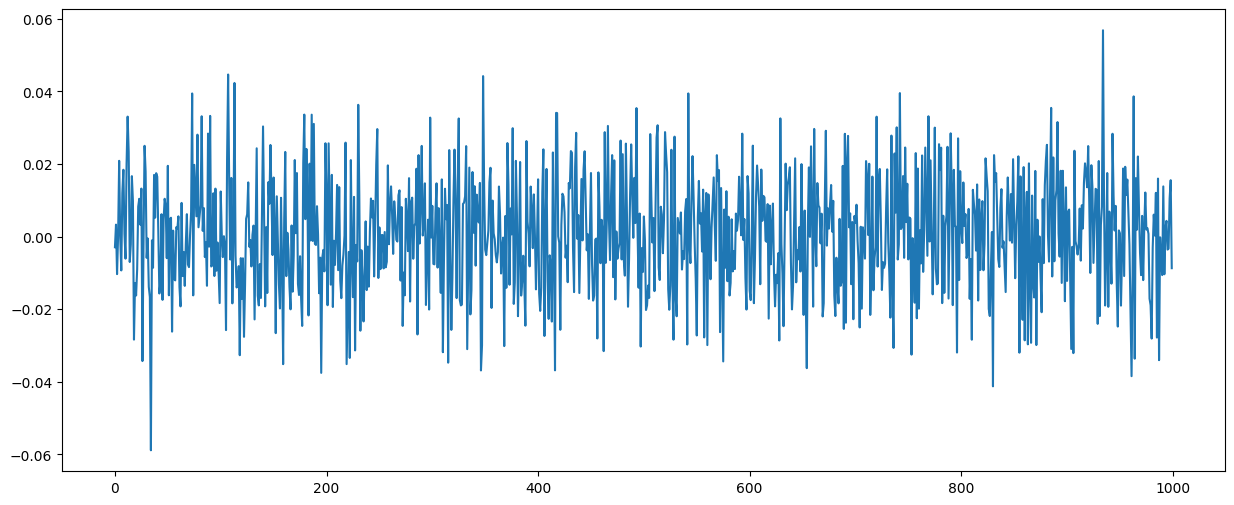

In [45]:
plt.figure(figsize=(15,6))
plt.plot(mc_stocks)
plt.show()

In [54]:
#MC simulation for daily direction of stock price usin Brownian motion
log_std=stock["log_return"].std()
log_var=stock["log_return"].var()
drift=log_mean-(1/2)*log_var #direction of return based on the past

np.array(drift)
np.array(log_std)

norm.ppf(0.95) #it give the critical value, the 95% of the obervations are between ..-1,65.. -- 1,65..
#significance level=1-α=5%
x=np.random.rand(10,2)
Z=norm.ppf(x)
t_internals=1000 #rows
iterations3=10 #columns

daily_return=np.exp(np.array(drift)+np.array(log_std)*norm.ppf(np.random.rand(t_internals,iterations3)))


                    

Text(0, 0.5, 'Price')

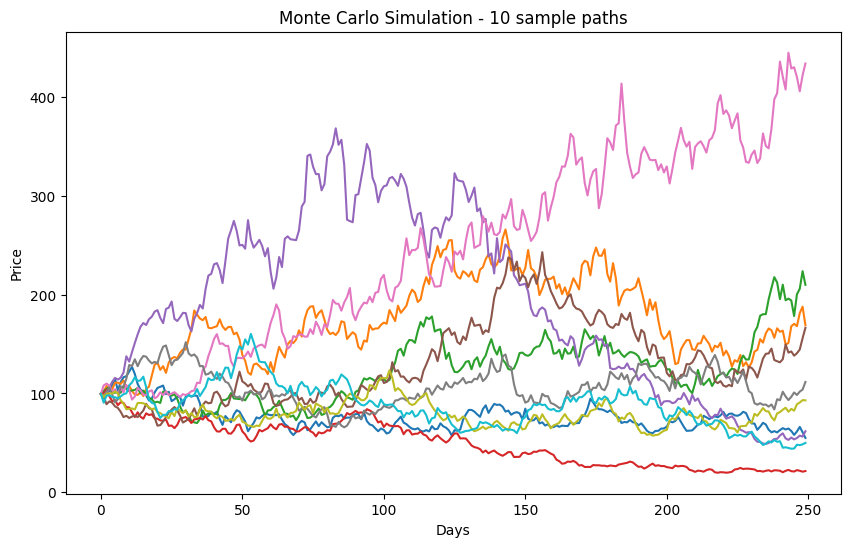

In [59]:
daily_std=np.array(log_std)*(250**0.5)
t_internals2=250 #tradinf days per year
T=10 #years
delt_t=T/t_internals2
iterations3=10000
rf=0.0411 
z=np.random.standard_normal((t_internals2,iterations3))
s=np.zeros_like(z)
s0=stock["Adj Close"].iloc[-1]
s[0]=s0

for t in range(1, t_internals2):
    s[t]=s[t-1]*np.exp((rf-0.5*daily_std**2)*delt_t+daily_std*delt_t**0.5*z[t])

plt.figure(figsize=(10,6))
plt.plot(s[:,:10])
plt.title("Monte Carlo Simulation - 10 sample paths")
plt.xlabel("Days")
plt.ylabel("Price")
